# TTT4185 Machine learning for Speech technology

## Computer assignment 2: Classification using the Bayes Decision Rule and Support Vector Machines

This assignment assumes that the student has knowledge about the Bayes Decision Rule, maximum likelihood estimation and support vector machines.

In this assignment we will use `scikit-learn` (http://scikit-learn.org/stable/), which is a powerful and very popular Python toolkit for data analysis and machine learning, and `pandas` (https://pandas.pydata.org), which implements the all-powerful `DataFrame`.

In this assigment we will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition the speaker ID and the gender of the speaker are given for each phoneme.

### Problem 1

In this problem we will use the Bayes decision rule to classify vowels based on their formants. The formants have been extracted from the open database `VTR Formants database` (http://www.seas.ucla.edu/spapl/VTRFormants.html) created by Microsoft and UCLA.

(a) Download the files `Train.csv` and `Test.csv` from Blackboard, and load them into a `pandas` dataframe using the command `pd.read_csv`. Using the training data, create a single scatter plot of "F1" vs "F2" for the three vowels
- "ae" as in "bat"
- "ey" as in "bait"
- "ux" as in "boot"

Just eyeing the plots, discuss which classes will be hardest to classify correctly.

&lt;matplotlib.legend.Legend at 0x1bca00f370&gt;

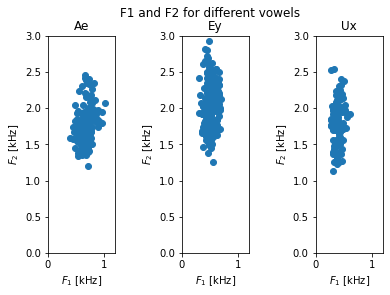

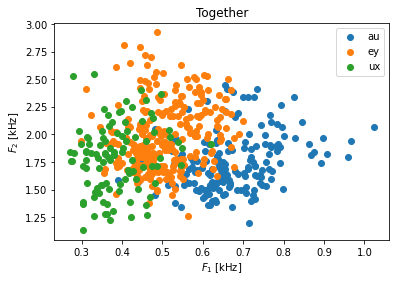

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load data
train = pd.read_csv("csvfiles/Train.csv")
test = pd.read_csv("csvfiles/Test.csv")

# Extract vowels
aes = train[train["Phoneme"] == 'ae']
eys = train[train["Phoneme"] == 'ey']
uxs = train[train["Phoneme"] == 'ux']

# Extracting plotting data
aes_f1 = aes["F1"]
eys_f1 = eys["F1"]
uxs_f1 = uxs["F1"]

aes_f2 = aes["F2"]
eys_f2 = eys["F2"]
uxs_f2 = uxs["F2"]

# Creating plots
fig, (ax_aes,ax_eys,ax_uxs) = plt.subplots(1,3)
fig.subplots_adjust(wspace=1)
fig.suptitle("F1 and F2 for different vowels")

X_AXIS_RANGE = [0,1.2]
Y_AXIS_RANGE = [0,3]
# Ae
ax_aes.scatter(aes_f1,aes_f2)
ax_aes.set_xlabel("$F_1$ [kHz]")
ax_aes.set_ylabel("$F_2$ [kHz]")
ax_aes.set_title("Ae")
ax_aes.set_xlim(X_AXIS_RANGE[0],X_AXIS_RANGE[1])
ax_aes.set_ylim(Y_AXIS_RANGE[0],Y_AXIS_RANGE[1])
# Ey
ax_eys.scatter(eys_f1,eys_f2)
ax_eys.set_xlabel("$F_1$ [kHz]")
ax_eys.set_ylabel("$F_2$ [kHz]")
ax_eys.set_title("Ey")
ax_eys.set_xlim(X_AXIS_RANGE[0],X_AXIS_RANGE[1])
ax_eys.set_ylim(Y_AXIS_RANGE[0],Y_AXIS_RANGE[1])
# Ux
ax_uxs.scatter(uxs_f1,uxs_f2)
ax_uxs.set_xlabel("$F_1$ [kHz]")
ax_uxs.set_ylabel("$F_2$ [kHz]")
ax_uxs.set_title("Ux")
ax_uxs.set_xlim(X_AXIS_RANGE[0],X_AXIS_RANGE[1])
ax_uxs.set_ylim(Y_AXIS_RANGE[0],Y_AXIS_RANGE[1])

fig.show()

# Together
fig,ax = plt.subplots(1,1)
ax.set_title("Together")
ax.set_xlabel("$F_1$ [kHz]")
ax.set_ylabel("$F_2$ [kHz]")
ax.scatter(aes_f1,aes_f2,label="au")
ax.scatter(eys_f1,eys_f2,label="ey")
ax.scatter(uxs_f1,uxs_f2,label="ux")
plt.legend()


Look at the plot, I believe au will be hardest, since it has the least overlap. Ux and Ey seems to have more overlap, and thus I belive those will be the easiest.

(b) Use the Bayes Decision Rule to create a classifier for the phonemes 'ae', 'ey' and 'ux' under the following constraints:
- The feature vector $x$ contains the first two formants, "F1" and "F2".
- The distribution of $x$ given a phoneme $c$, $P(x|c)$, is Gaussian.
- Use the maximum likelihood estimator to estimate the model parameters.

Test your classifier on the 'ae', 'ey' and 'ux' phonemes from the test set and present your results in a _confusion matrix_, that is, a table where you see how many times 'ae' was correctly classified, how many times it was wrongly classified as 'ey' and so on.

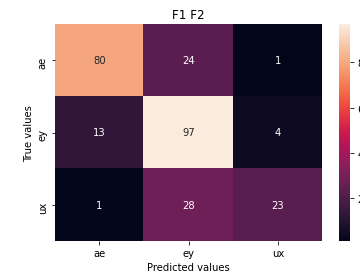

Error rate 26.2%


In [75]:
import seaborn as sns
from scipy.stats import multivariate_normal as mn

# Predict function to be used
def predict(f_mat, vowels, rvs):
    confusion_mat = np.zeros((len(f_mat), len(f_mat)))
    for i, v  in enumerate(vowels):
        values = f_mat[v]
        preds = []

        for k,rv in rvs.items():
            preds.append(prior[k]*(rv.pdf(values)))
        preds = np.argmax(preds, axis=0)

        for pred in preds:
            confusion_mat[i,pred] += 1
    return confusion_mat
        
# Fucntion for plotting confusion matrix
def plot_confusion_matrix(confusion_matrix, title, vowels):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.heatmap(confusion_matrix, annot=True, xticklabels=vowels, yticklabels=vowels, ax=ax)
    ax.set_title(title)
    ax.set_ylabel("True values")
    ax.set_xlabel("Predicted values")
    plt.show()
    error_rate = round((np.sum(confusion_matrix) - np.trace(confusion_matrix)) / np.sum(confusion_matrix)* 100, 2)
    print(f"Error rate {error_rate}%")

# It can be shown that MLE for mean and variance for a gaussian distributed variable is the sample mean and sample variance.

# Computing means of vowels
aes_formant_mean = np.array([np.mean(aes_f1),np.mean(aes_f2)])
eys_formant_mean = np.array([np.mean(eys_f1),np.mean(eys_f2)])
uxs_formant_mean = np.array([np.mean(uxs_f1),np.mean(uxs_f2)])

aes_formant_cov = np.array([np.cov(aes_f1),np.cov(aes_f2)])
eys_formant_cov = np.array([np.cov(eys_f1),np.cov(eys_f2)])
uxs_formant_cov = np.array([np.cov(uxs_f1),np.cov(uxs_f2)])

# Computing covariance matrix of vowels
_aes = np.array([[f1, f2] for f1, f2 in zip(aes_f1, aes_f2)])
_eys = np.array([[f1, f2] for f1, f2 in zip(eys_f1, eys_f2)])
_uxs = np.array([[f1, f2] for f1, f2 in zip(uxs_f1, uxs_f2)])
aes_cov = np.array(np.cov(np.array(_aes.T)))
eys_cov = np.array(np.cov(np.array(_eys.T)))
uxs_cov = np.array(np.cov(np.array(_uxs.T)))

# Wrapping covs and means in a dict to make it more clear
vowels = ["ae","ey","ux"]
mean = {}
cov = {}
for v in vowels:
    if v == "ae":
        mean[v] = aes_formant_mean
        cov[v] = aes_cov
    elif v == "ey":
        mean[v] = eys_formant_mean
        cov[v] = eys_cov
    elif v == "ux":
        mean[v] = uxs_formant_mean
        cov[v] = uxs_cov


# Finding total amount of samples
total_samples = len(aes) + len(eys) + len(uxs)

# Prior prob of a vowel is the amount of this vowel divided by the total amount of vowels
prior = {"ae":len(aes)/total_samples,"ey":len(eys)/total_samples,"ux":len(uxs)/total_samples}

# Computing multivariate normal dist.
rvs = {}
for v in vowels:
    rvs[v] = mn(mean=mean[v],cov=cov[v])
# Testing with test set
aes_test = test[test["Phoneme"] == 'ae']
eys_test = test[test["Phoneme"] == 'ey']
uxs_test = test[test["Phoneme"] == 'ux']

# Wrapping in a dict for simpliticy and computing 
test_dict = {"ae": aes_test, "ey": eys_test, "ux": uxs_test}
frequency_matrix = {}
for key, vow in test_dict.items():
    frequency_matrix[key] = np.array([[f1, f2] for f1, f2 in zip(vow["F1"], vow["F2"])])

# Using the functions defined in the start to compute final results
confusion_matrix = predict(frequency_matrix, vowels, rvs)
plot_confusion_matrix(confusion_matrix, "F1 F2", vowels)

*Try:* To visualize the classes models and the classifier created in (b), you can:

- Plot the contours for each Gaussian distribution in the model, that is the class conditional likelihoods $P(x|c)$.
- Plot the decision regions for the Bayesian classifier.

(c) Extend your classifier to include the features "F1"-"F4" and compare the results with those in (b). Finally use all available information "F1"-"F4" and "B1-B4". How does the performance of this classifier compare with the simpler classifiers using fewer features?

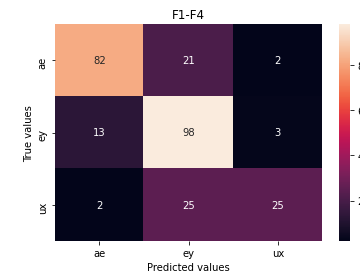

Error rate 24.35%


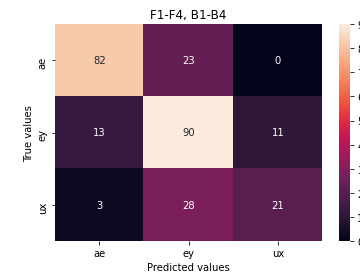

Error rate 28.78%


In [76]:
# Wrapping vowel data in a dict in order to simplify the code
vowel_data = {"ae":aes,"ey":eys,"ux":uxs}

# Creating one functoin which can crate rvs to avoid repeated code
def create_rv(vowel_data,unwanted,vowels,cov_diagonal=False):
    mean = {}
    cov = {}
    for vowel, vowel_freqs in vowel_data.items():
        _mean = vowel_freqs.drop(unwanted,axis=1).values
        mean[vowel] = np.array(np.mean(_mean,axis=0))
        _cov = np.array(np.cov(np.array(_mean.T)))
        if cov_diagonal:
            _cov = _cov*np.eye(_cov.shape[0])
        cov[vowel] = _cov
    rv = {}
    for v in vowels:
        rv[v] = mn(mean=mean[v],cov=cov[v])
    return rv

# Part 1 using F1-F4
unwanted = ["SpeakerID", "Gender", "Phoneme", "B1", "B2", "B3", "B4"]
frequency_matrix = {}
for vowel, vowel_freqs in test_dict.items():
    frequency_matrix[vowel] = vowel_freqs.drop(unwanted,axis=1).values
rv = create_rv(vowel_data,unwanted,vowels)
confusion_matrix = predict(frequency_matrix,vowels,rv)
plot_confusion_matrix(confusion_matrix,"F1-F4",vowels)

# Part 2 using all features
unwanted = ["SpeakerID", "Gender", "Phoneme"]
frequency_matrix = {}
for vowel, vowel_freqs in test_dict.items():
    frequency_matrix[vowel] = vowel_freqs.drop(unwanted,axis=1).values
rv = create_rv(vowel_data,unwanted,vowels)
confusion_matrix = predict(frequency_matrix,vowels,rv)
plot_confusion_matrix(confusion_matrix,"F1-F4, B1-B4",vowels)


(d) We want to make the model slightly more powerful by modeling the feature vector conditional on both the vowel and gender of speaker, that is $P(x|g,c)$, where $g$ is the gender of the speaker and $c$ is the phoneme label. Show how these models can be used for phoneme classification using marginalization over the gender.

Assume that $P(x|g,c)$ is a multivariate Gaussian and compute the maximum likelihood estimates for the models. Compare the result on the test set with the results in (c).

In [77]:
from collections import defaultdict



(e) When using Gaussian classifiers we often avoid computing the entire covariance matrix, but instead we only use the diagonal of the matrix. Repeat the results in (d) using only diagonal covariance matrices and compare the results.

### Problem 2

In this problem we use the support vector machine (SVM) to build classifiers. We use the same dataset as in Problem 1. It is up to you to select which features to use.

We use the function `sklearn.svm.SVC` from `scikit-learn` in this problem. First you need to get your data on the format that `SVC` expects, which is a matrix where every row is a feature vector, and a list of integer labels corresponding to each row. We suggest using "ae" = 0, "ey" = 1 and "ux" = 2.

An example on how to use the `SVC` is given in http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC. In short we do the following (for a linear kernel):
- Instantiate an SVC object: `cls = SVC(kernel='linear')`
- Train the SVM using the feature vector matrix `train_X`, and label vector `train_Y`: `cls.fit(train_X, train_Y)`
- Predict labels on the test set `Test_X` using: `cls.predict(Test_X)`

(a) Create a linear SVM with different penalty terms $C=\{0.1, 1, 10\}$ and compare with the results in Problem 1.

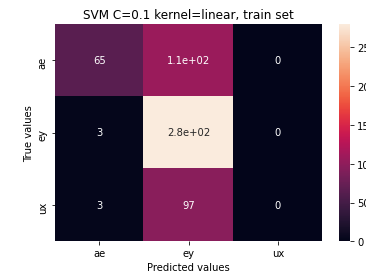

Error rate 37.95%


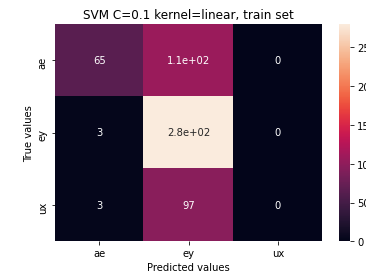

Error rate 37.95%


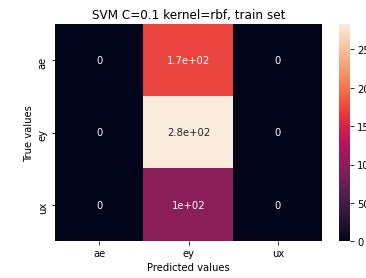

Error rate 49.1%


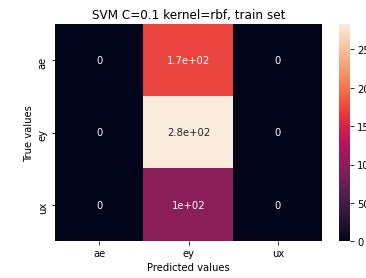

Error rate 49.1%


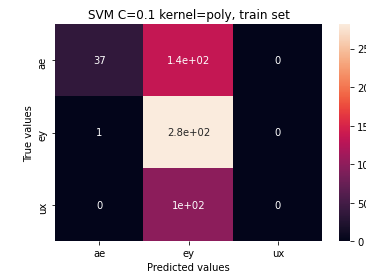

Error rate 42.63%


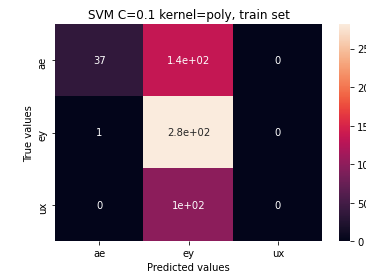

Error rate 42.63%


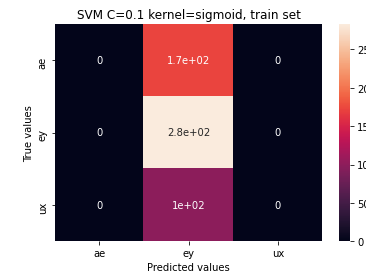

Error rate 49.1%


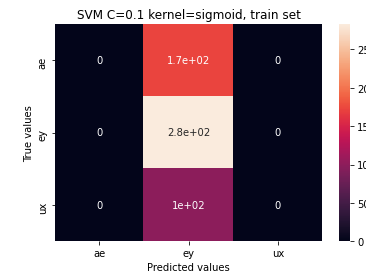

Error rate 49.1%


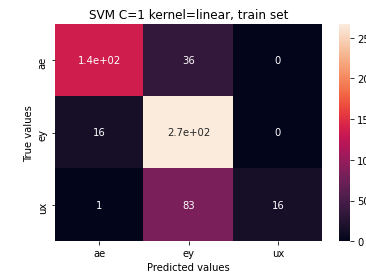

Error rate 24.46%


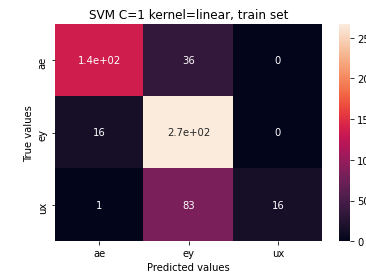

Error rate 24.46%


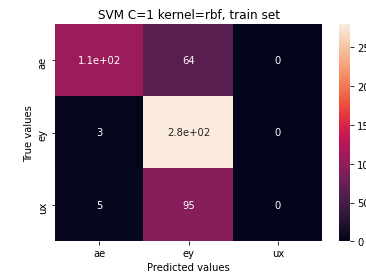

Error rate 30.04%


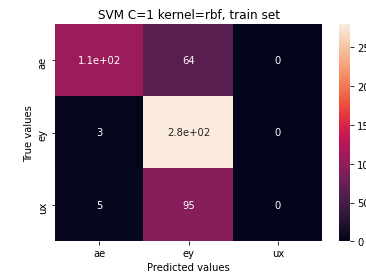

Error rate 30.04%


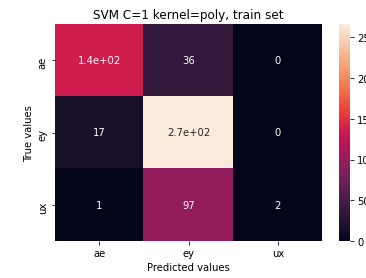

Error rate 27.16%


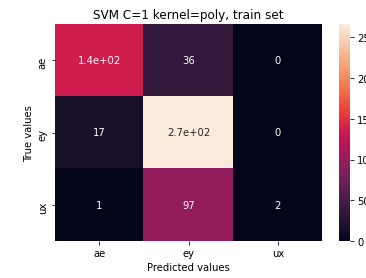

Error rate 27.16%


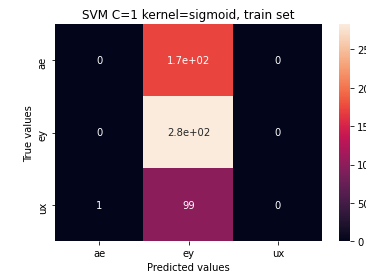

Error rate 49.1%


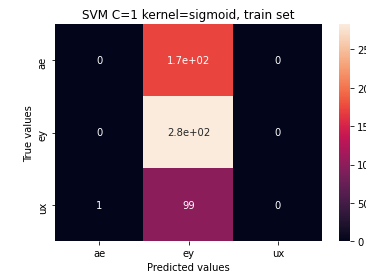

Error rate 49.1%


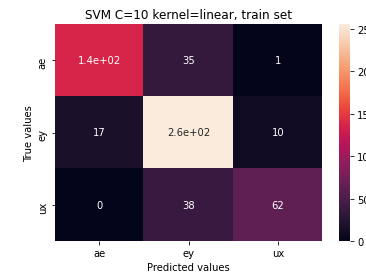

Error rate 18.17%


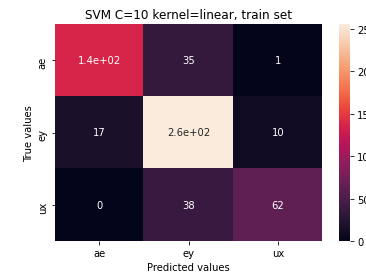

Error rate 18.17%


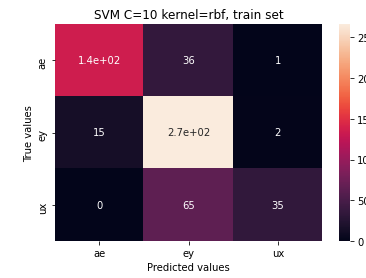

Error rate 21.4%


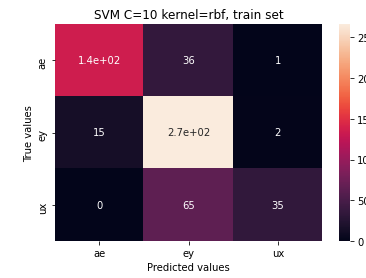

Error rate 21.4%


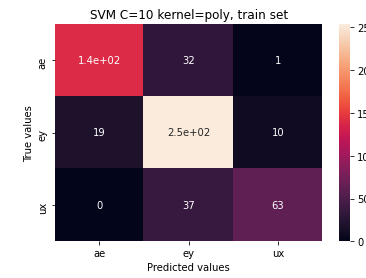

Error rate 17.81%


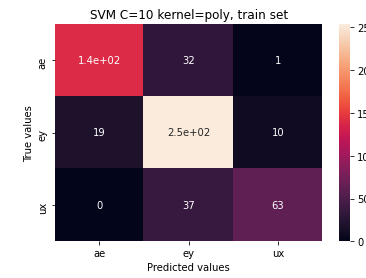

Error rate 17.81%


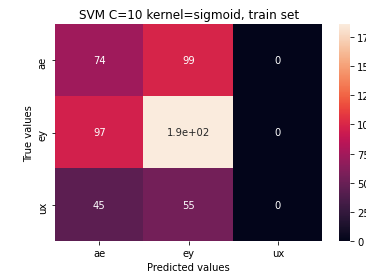

Error rate 53.24%


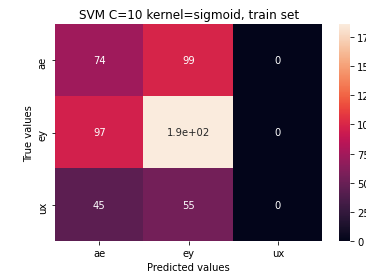

Error rate 53.24%


In [78]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

unwanted = ["SpeakerID", "Gender", "Phoneme"]
train_Y = []
train_X = []
test_Y = []
test_X = []
for v in vowels:
    vowel_train = vowel_data[v]
    training_values = vowel_train.drop(unwanted,axis=1).values
    train_X.extend(training_values)
    train_Y.extend([1*vowels.index(v) for i in range(len(training_values))])

    vowel_test = test_dict[v]
    testing_values = vowel_test.drop(unwanted,axis=1).values
    test_X.extend(testing_values)
    test_Y.extend([1*vowels.index(v) for i in range(len(testing_values))])

C = [0.1,1,10]
for penalty in C:
    for kernel in ["linear","rbf","poly","sigmoid"]:
        cls = SVC(kernel=kernel,C=penalty)
        cls.fit(train_X,train_Y)

        result = cls.predict(train_X)
        confusion_mat = confusion_matrix(train_Y,result)
        plot_confusion_matrix(confusion_mat,f"SVM C={penalty} kernel={kernel}, train set",vowels)

        result = cls.predict(train_X)
        confusion_mat = confusion_matrix(train_Y,result)
        plot_confusion_matrix(confusion_mat,f"SVM C={penalty} kernel={kernel}, train set",vowels)

(b) Try different kernels ('rbf', 'poly', 'sigmoid') and compare the results. Choose one of the kernels and use different penalty terms $C$. What happens with the performance on the training set when you increase $C$? What happens with the performance on the test set?